## DATABASE - ankieta wykonana przez redditora: https://www.reddit.com/r/pokemon/comments/c0w4s0/favourite_pok%C3%A9mon_survey_results/

## POMYSŁ

Wykres ma na celu sprawdzenie, czy pokemony uwielbiane przez respondentów mają tendencję do bycia silniejszymi (total)

In [248]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [249]:
df=pd.read_csv('pokemon_data.csv')
df=df.set_index('name')
df

,dexnum,generation,type1,type2,species,height,weight,ability1,ability2,hidden_ability,...,catch_rate,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group
name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,NaN,...,45,50,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
Ivysaur,2,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,NaN,...,45,50,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
Venusaur,3,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,NaN,...,45,50,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
Charmander,4,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,NaN,...,45,50,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
Charmeleon,5,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,NaN,...,45,50,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Raging Bolt,1021,9,Electric,Dragon,Paradox Pokémon,5.2,480.0,Protosynthesis,NaN,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Ancient Paradox
Iron Boulder,1022,9,Rock,Psychic,Paradox Pokémon,1.5,162.5,Quark Drive,NaN,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox
Iron Crown,1023,9,Steel,Psychic,Paradox Pokémon,1.6,156.0,Quark Drive,NaN,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox


In [250]:
favs=pd.read_excel('pokemon_favourites.xlsx')
favs=favs.set_index('name')

In [251]:
favs

,number of votes
name,
Bulbasaur,710
Ivysaur,83
Venusaur,127
Charmander,374
Charmeleon,70
...,...
Stakataka,13
Blacephalon,8
Zeraora,17


In [252]:
favs=favs.nlargest(15, 'number of votes')
favs

,number of votes
name,
Charizard,1107
Gengar,1056
Arcanine,923
Bulbasaur,710
Blaziken,613
Umbreon,607
Lucario,604
Gardevoir,585
Eevee,581


In [253]:
df=pd.merge(df, favs, left_index=True, right_index=True, how='inner').reset_index()
df


,name,dexnum,generation,type1,type2,species,height,weight,ability1,ability2,...,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group,number of votes
0,Bulbasaur,1,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,50,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,710
1,Charizard,6,1,Fire,Flying,Flame Pokémon,1.7,90.5,Blaze,Solar Power,...,50,267,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,1107
2,Squirtle,7,1,Water,NaN,Tiny Turtle Pokémon,0.5,9.0,Torrent,Rain Dish,...,50,63,Medium Slow,Monster,Water 1,87.5,12.5,20,Ordinary,523
3,Arcanine,59,1,Fire,NaN,Legendary Pokémon,1.9,155.0,Intimidate,Flash Fire,...,50,194,Slow,Field,NaN,75.0,25.0,20,Ordinary,923
4,Gengar,94,1,Ghost,Poison,Shadow Pokémon,1.5,40.5,Cursed Body,NaN,...,50,250,Medium Slow,Amorphous,NaN,50.0,50.0,20,Ordinary,1056
5,Eevee,133,1,Normal,NaN,Evolution Pokémon,0.3,6.5,Run Away,Adaptability,...,50,65,Medium Fast,Field,NaN,87.5,12.5,35,Ordinary,581
6,Dragonite,149,1,Dragon,Flying,Dragon Pokémon,2.2,210.0,Inner Focus,Multiscale,...,35,300,Slow,Dragon,Water 1,50.0,50.0,40,Ordinary,551
7,Typhlosion,157,2,Fire,NaN,Volcano Pokémon,1.7,79.5,Blaze,Flash Fire,...,50,267,Medium Slow,Field,NaN,87.5,12.5,20,Ordinary,534
8,Ampharos,181,2,Electric,NaN,Light Pokémon,1.4,61.5,Static,Plus,...,50,255,Medium Slow,Field,Monster,50.0,50.0,20,Ordinary,529
9,Umbreon,197,2,Dark,NaN,Moonlight Pokémon,1.0,27.0,Synchronize,Inner Focus,...,35,184,Medium Fast,Field,NaN,87.5,12.5,35,Ordinary,607


In [254]:
df=df.sort_values('number of votes', ascending=False).reset_index(drop=True)
df=df.reset_index()
df['index']=df['index']+1
df=df.rename(columns={'index':'ranking'})
df

,ranking,name,dexnum,generation,type1,type2,species,height,weight,ability1,...,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group,number of votes
0,1,Charizard,6,1,Fire,Flying,Flame Pokémon,1.7,90.5,Blaze,...,50,267,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,1107
1,2,Gengar,94,1,Ghost,Poison,Shadow Pokémon,1.5,40.5,Cursed Body,...,50,250,Medium Slow,Amorphous,NaN,50.0,50.0,20,Ordinary,1056
2,3,Arcanine,59,1,Fire,NaN,Legendary Pokémon,1.9,155.0,Intimidate,...,50,194,Slow,Field,NaN,75.0,25.0,20,Ordinary,923
3,4,Bulbasaur,1,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,...,50,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,710
4,5,Blaziken,257,3,Fire,Fighting,Blaze Pokémon,1.9,52.0,Blaze,...,50,239,Medium Slow,Field,NaN,87.5,12.5,20,Ordinary,613
5,6,Umbreon,197,2,Dark,NaN,Moonlight Pokémon,1.0,27.0,Synchronize,...,35,184,Medium Fast,Field,NaN,87.5,12.5,35,Ordinary,607
6,7,Lucario,448,4,Fighting,Steel,Aura Pokémon,1.2,54.0,Steadfast,...,50,184,Medium Slow,Field,Human-Like,87.5,12.5,25,Ordinary,604
7,8,Gardevoir,282,3,Psychic,Fairy,Embrace Pokémon,1.6,48.4,Synchronize,...,35,259,Slow,Amorphous,Human-Like,50.0,50.0,20,Ordinary,585
8,9,Eevee,133,1,Normal,NaN,Evolution Pokémon,0.3,6.5,Run Away,...,50,65,Medium Fast,Field,NaN,87.5,12.5,35,Ordinary,581
9,10,Dragonite,149,1,Dragon,Flying,Dragon Pokémon,2.2,210.0,Inner Focus,...,35,300,Slow,Dragon,Water 1,50.0,50.0,40,Ordinary,551


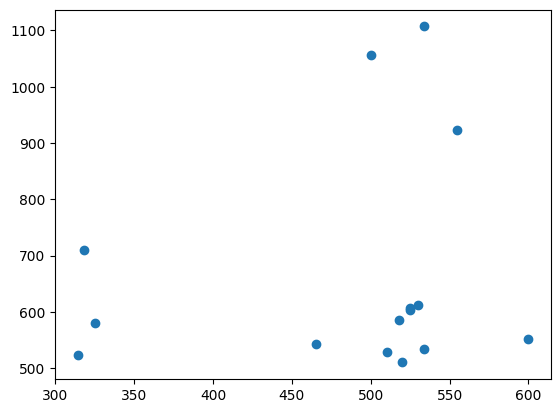

In [255]:
plt.scatter(df['total'], df['number of votes'])

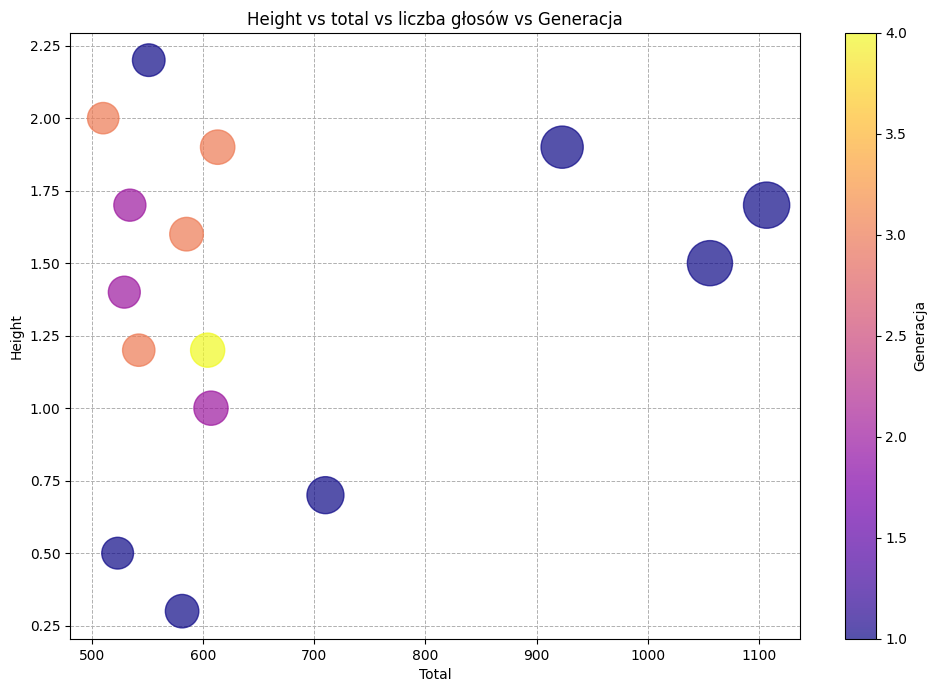

In [256]:
fig, ax=plt.subplots(figsize=(10,7))

x=[item for item in df['height']]
y=[item for item in df['number of votes']]
size=[item for item in df['number of votes']] #pomnożone przez liczbę bo możemy to zrobić, na koniec sprawdzamy jak ma wygldać
color = [item for item in df['generation']]

im=plt.scatter(y,x,s=size, alpha=0.7, c=color, zorder=2, cmap='plasma') #w babelkowym musi byc przezroczystość!! żeby zobaczyć czy jest inna kropka pod nia

plt.title("Height vs total vs liczba głosów vs Generacja")
plt.xlabel("Total")
plt.ylabel("Height")

plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.colorbar(im, label='Generacja')
plt.tight_layout(pad=1) #pad zmienia w sumie ramki - etykiety nie moga być ścięte - trzeba dodać ramkę odpowiedniej 
                        #długości i grubości aby wszystkie etykiety zostały
#plt.savefig('karty_graficzne.pdf')

#ODZYSKUJEMY WSPÓŁRZĘDNE ŻÓŁTEJ KROPKI
indeks=[it for it, val in enumerate(color) if val==max(color)]
xm=x[indeks[0]]
ym=y[indeks[0]]

#f"f({xm:.2f})={ym:.2f}" zmienic najlepszy stosunek jakosc 

#plt.annotate(f"Wydajność/Cena={ round(max(color),2)})", xy=(ym, xm), xytext=(ym+2000, xm+6500), arrowprops=dict(arrowstyle="->", connectionstyle="angle3, angleA=0, angleB=-90"),
 #       bbox=dict(boxstyle='round,pad=1', fc='yellow', alpha=0.3)
 #   );


In [ ]:
def marker(dexnum,x,y,z):
    pokemon=OffsetImage(plt.imread(f'images/images/{dexnum}.png'), zoom=z)
    znacznik=AnnotationBbox(pokemon, (x,y), frameon=False)
    ax.add_artist(znacznik)


In [257]:
dane=np.array(list(zip(df['dexnum'], df['name'], df['number of votes'], df['total'])))
dexnum=dane[:,0].astype(int)
name=dane[:,1]
nvotes=dane[:,2].astype(int)
total=dane[:,3].astype(int)

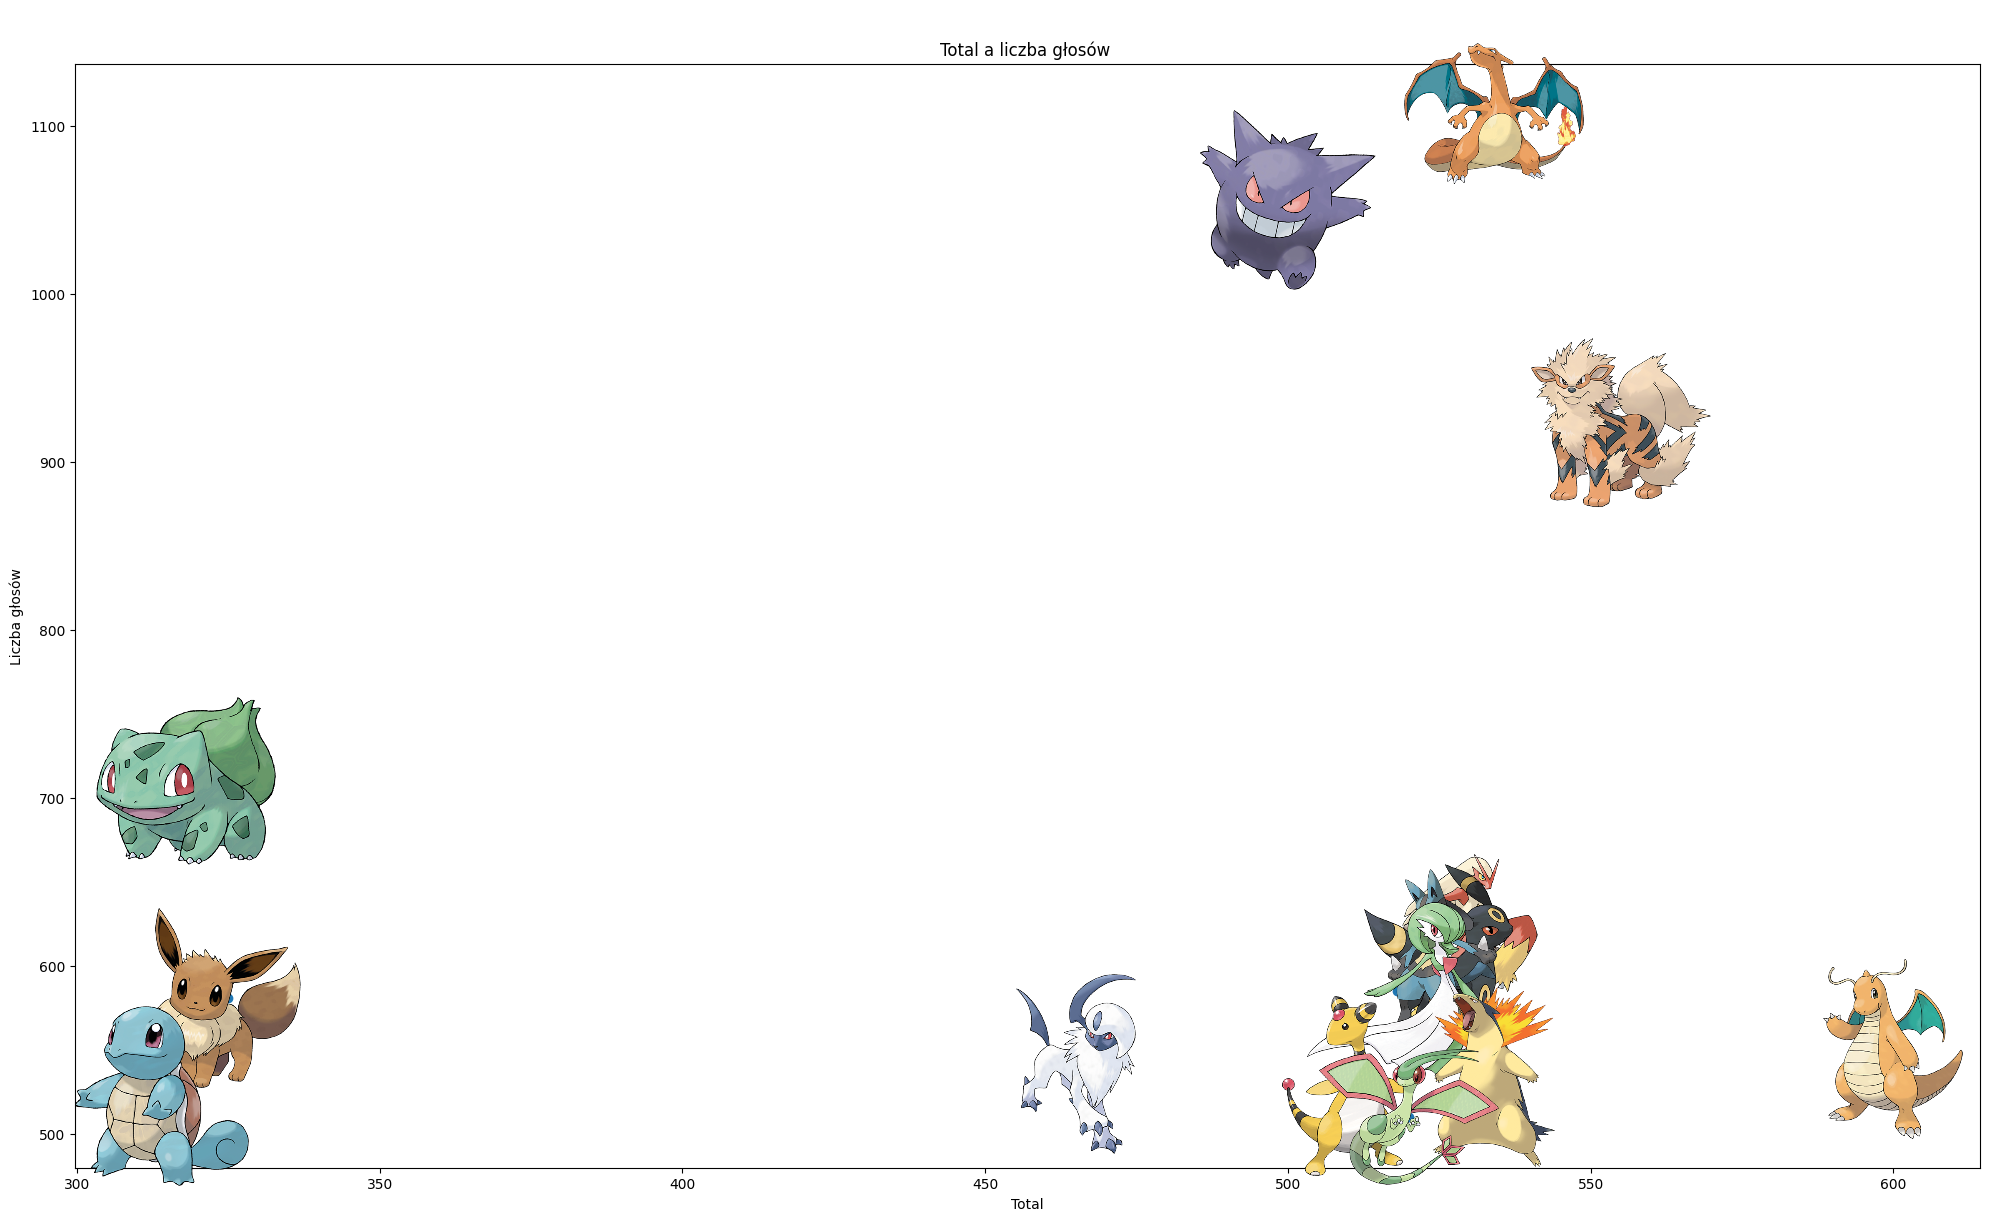

In [262]:
fig, ax=plt.subplots(figsize=(20,12))

ax.scatter(total,nvotes)
plt.title("Total a liczba głosów ")
plt.xlabel("Total")
plt.ylabel("Liczba głosów")
plt.tight_layout()

for i in range(len(dexnum)):
    marker(dexnum[i], total[i], nvotes[i], 0.3)

